# Das Abtasttheorem audio-visuell dargestellt
Version 16.5.2020, S. Mack

Es gibt viele verschiedene Formulierungen des Abtasttheorems -oder wie man es auch nennt- des Nyquist-Shannon-Abtasttheorems. Eine gängige Formulierung ist folgende: 
 
*"Wenn ein Signal Frequenzen bis B Hz enthält, dann muss es mit einer Frequenz von mehr als 2 mal B Hz abgetastet werden, damit keine Information verloren geht."* 
 
In Wikipedia ist folgende Formulierung zu lesen:  
*"Wenn ein Signal keine Frequenzanteile größer B Hz enthält, dann kann es aus einer Folge von äquidistanten Abtastwerten exakt rekonstruiert werden kann, wenn es mit einer Frequenz von größer als 2 mal B abgetastet wurde."*  

(Die Abkürzung *B* steht hier für den Begriff *Bandbreite*.)

**In diesem Jupyter Notebook soll das Abtasttheorem nicht mathematisch bewiesen werden. Vielmehr soll eine grafische und hörbare Darstellung des abgetasteten Signals im Vergleich zum Analogsignal experimentell zeigen, ob die Frequenzinformation erhalten wird oder nicht.** 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# %-Anweisung (speziell für Jupyter Notebooks) damit Plots hier im Text dargestellt werden
%matplotlib inline

## Das analoge Signal, die Abtastung und das daraus rekonstruierte Signal
Im nachfolgenden Quellcode wird ein Sinussignal mit einer Frequenz ``f_sig`` zu den Zeitpunkten ``t_data``  erzeugt. Diese Zeiten liegen so dicht, dass dieses Signal ein quasi analoges zeitkontinuierliches Signal ``sig_ana`` repräsentiert.  
Das gleiche Sinaussignal wird einer Abtastfrequenz ``f_samp`` d.h. zu den Zeitpunkten ``t_dig`` abgetastet. Diese Abtastzeitpunkte liegen um den Faktor ``si_fac`` weiter auseinander als die des "analogen" Signals. Das abgetastete Signal repräsentiert somit ein zeitdiskretes Signal.

In [73]:
T = 1 # Dauer des Zeitsignals, Anzahl Abtastwerte = T * f_samp

# Faktor mit dem durch Interpolation Anzahl der Werte erhöht wird
# Nach jedem digitalen Wert (außer dem letzten) kommen (si_fac - 1) neue Werte
# dazu. Insgesamt erhöht sich die Anzahl der Werte um (Ndig - 1) * si_fac
si_fac = 128
###################################
##### HIER MIT WERTEN SPIELEN #####
###################################
f_sig = 600  # Signalfrequenz in Hz
f_samp = 1000 # Abtastfrequenz in Hz
###################################
# Dichte der Datenpunkte der Zeitfunktion, mit der beim analogen wie auch beim 
# digitalen interpolierten Signal die FFT durchgeführt wird
f_data = f_samp * si_fac

# Festlegung der Abtastpunkte von -1 bis 1+1/fs mit Abstand 1/fs
t_dig = np.arange(0,T+1/f_samp,1/f_samp) 
t_data = np.arange(0,T,1/f_data)
sig_dig = np.sin(2*np.pi*f_sig*t_dig) # Abgetastetes Signal nicht interpoliert
sig_ana = np.sin(2*np.pi*f_sig*t_data) # Quasi analoges Signal

### Visuelle Darstellung
Nachfolgend werden die oben erzeugten Signale grafisch dargestellt.

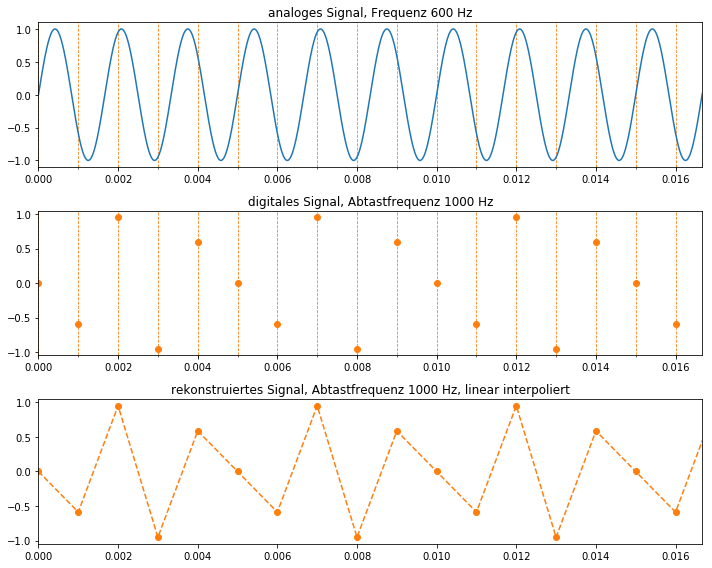

In [74]:
# Darstellung analoges und digitales abgetastetes Signal
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols= 1)
ax1.plot(t_data,sig_ana,'-', color='C0')
ax1.set_xlim(left = 0,right = 10/f_sig) # Drei Perioden darstellen
ax1.set_title('analoges Signal, Frequenz %2.0f Hz' % f_sig)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1/f_samp))
ax1.xaxis.grid(which='minor',linestyle='--',color='C1')
ax2.plot(t_dig,sig_dig,'o',color='C1')
ax2.set_xlim(left = 0,right = 10/f_sig)
ax2.set_title('digitales Signal, Abtastfrequenz %2.0f Hz' % f_samp)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1/f_samp))
ax2.xaxis.grid(which='minor',linestyle='--',color='C1')
ax3.plot(t_dig,sig_dig,'o--',color='C1')
ax3.set_xlim(left = 0,right = 10/f_sig)
ax3.set_title('rekonstruiertes Signal, Abtastfrequenz %2.0f Hz, linear interpoliert' % f_samp)
fig.set_size_inches((10,8))
plt.tight_layout() # Damit Achsenbeschriftungen nicht überschneiden

Wie die Grafiken oben zeigen, bleibt die Freuqenzinformation erhalten, wenn das Abtasttheorem erfüllt ist. Das rekonstruierte Signal ist dann zwar kantiger als das analoge Signal, aber seine dominante Frequenz ist gleich der des Analogsignals.

### Hörbare "Darstellung"
Im nachfolgenden Quellcode wird aus dem Abtastwerten mit linearer Interpolation ein Signal erzeugt, was die selbe Datenrate hat wie das ursprüngliche analoge Signal.
Damit wird es möglich beide Signale über den Lautsprecher auszugeben und damit hörbar zu machen.
Dafür wird mit der Funktion``numpy.piecewise``eine stückweise linear interpolierte Funktionswerte``sig_li``für die Zeiten``t_li``aus den Abtastwerten erzeugt:

In [75]:
# si_fac dichtere Zeitwerte t_li und dafür Werte sig_li für stückweise lin. Interpol erzeugen
# Quellcode entnommen aus Buch J. Unpingco: Python for Signal Processing.
interval=[] # Liste von Numpy arrays mit boolschen Werten für ein Samplingintervall
apprx = [] # Liste von Numpy arrays mit interpol. Werten für ein Samplingintervall

# Mehr Zeitwerte erzeugen: 'endpoint = False': Intervall bei linspace wird durch 20 statt 19 geteilt
# 'hstack': Zahlenreihen zu horizontalem Array zusammensetzen
t_li = np.hstack([np.linspace(t_dig[i],t_dig[i+1],si_fac,endpoint=False) for i in range(len(t_dig)-1) ])
for i in range(len(t_dig)-1):
    # Vergleich für jedes Element von t_li ob im entsprechenden Samplingintervall
    interval.append(np.logical_and(t_dig[i] <= t_li,t_li < t_dig[i+1]))
    apprx.append( (sig_dig[i+1]-sig_dig[i])/(t_dig[i+1]-t_dig[i])*(t_li[interval[-1]]-t_dig[i]) + sig_dig[i])
sig_li = np.piecewise(t_li,interval,apprx) # numpy Array mit Werten aus einzelnen Samplingintervallen von apprx

Im nachfolgendem Plot ist unten in Orange das analoge Sinussignal und oben in Blau eine stückweise lineare Interpolation des davon abgetasteten Signals dargestellt.

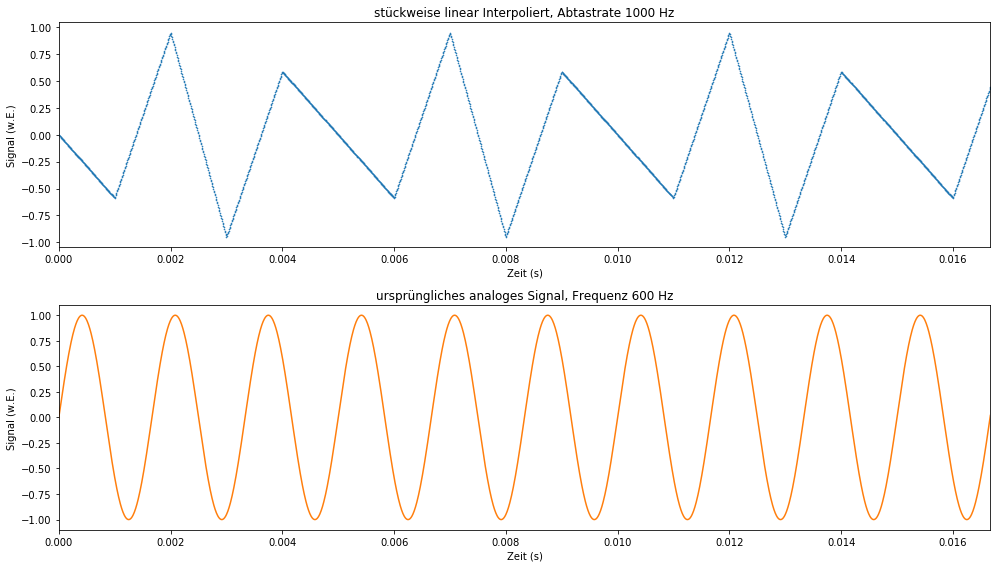

In [76]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(t_li,sig_li,'.',color='C0',markersize=1.2)
ax1.set_xlabel('Zeit (s)')
ax1.set_ylabel('Signal (w.E.)')
ax1.set_title('stückweise linear Interpoliert, Abtastrate %2.0f Hz' % f_samp)
ax1.set_xlim(left = 0,right = 10/f_sig)

ax2.plot(t_data,sig_ana,'-',color='C1')
ax2.set_xlabel('Zeit (s)')
ax2.set_ylabel('Signal (w.E.)')
ax2.set_title('ursprüngliches analoges Signal, Frequenz %2.0f Hz' % f_sig)
ax2.set_xlim(left = 0,right = 10/f_sig)
fig.set_size_inches((14,8))
plt.tight_layout()

Nun werden beide Signale als Audiosignal über den Computerlautsprecher ausgegeben. Die Samplingrate des DACs der Soundkarte ist jeweils gleich ``f_data``.  

Durch Klicken auf dem "Play-Button" im nachfolgenden Abschnitt wird das ursprüngliche analoge Signal hörbar gemacht.

In [77]:
import IPython.display as ipd
sr = f_data # sample rate
ipd.Audio(sig_ana, rate=sr) # play NumPy array

Nachfolgend wird das daraus abgeleitete linear interpolierte digitale Signal hörbar gemacht.  
Wenn das Samplingtheorem eingehalten wurde, also Samplingrate ``f_samp`` mindestens doppelt so groß ist wie Signalfrequenz ``f_sig``, dann haben beide Töne die gleiche Tonhöhe sprich Frequenz.  
Ist beispielsweise die Samplingrate nur wenig größer als die Signalfrequenz, dann hört man eine wesentlicht tiefere nämlich die Differenzfrequenz ``f_samp`` minus ``f_sig``.

In [78]:
ipd.Audio(sig_li, rate=sr)